In [69]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [70]:
xtrain = np.arange(10, dtype=np.float32).reshape(-1, 1)

In [71]:
ytrain = np.array([1, 1.3, 3.1, 2, 5, 6.3, 6.6, 7.4, 8, 9], dtype=np.float32)

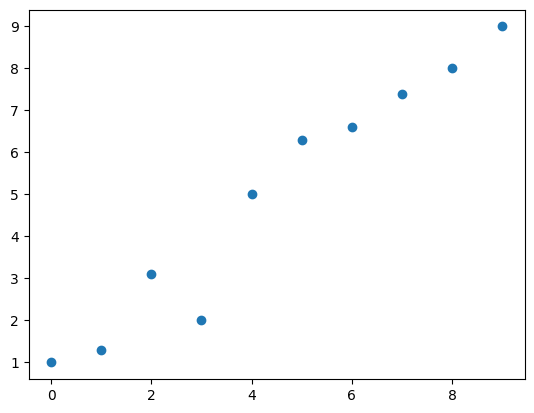

In [72]:
plt.scatter(xtrain, ytrain)

In [73]:
xnorm = (xtrain - np.mean(xtrain)) / np.std(xtrain)

In [74]:
xtrain_ = torch.tensor(xnorm, dtype=torch.float32)

In [75]:
ytrain_ = torch.tensor(ytrain.reshape(-1, 1), dtype=torch.float32)

In [76]:
train = torch.utils.data.TensorDataset(xtrain_, ytrain_)

In [77]:
train = torch.utils.data.DataLoader(
    dataset=train, batch_size=2, shuffle=True
    )

definindo a função de perda

In [78]:
def fn_loss(input_, target_):
    return (input_ - target_).pow(2).mean()

def fn_loss_2(input_, target_):

    return (input_ - target_).pow(2).mean().sqrt()

definindo o modelo

In [79]:
torch.manual_seed(seed=1)

pesos_ = torch.randn(1)
pesos_.requires_grad_()
bias_  = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ pesos_ + bias_

In [80]:
lr = 0.001
log_epochs = 10

In [81]:
import time
def printing_(i,length_train, loss, sleep=0.1):
    progress = i / len(train)
    print(  f"\rBatch {i}/{length_train} "
            f"[{int(progress * 20) * '='}>{int((1 - progress) * 30) * ' '}] "
            f"{progress * 100:.2f}% - Loss: {loss:.4f}", end="")
    time.sleep(sleep)
    
def final_epoch(l_loss):
    print()
    print(f'    > loss_mean:{np.mean(l_loss):2f}')

In [82]:
len_ = len(train)
melhor    = np.Inf

count_ = 0
paciencia = 3

for epoch in range(10):

    l_loss = []

    for batch_i, (xbatch, ybatch) in enumerate(train, 1):
        pred = model(xbatch)

        loss = fn_loss_2(pred, ybatch)

        loss.backward()
        l_loss.append(loss.item())
        if ( epoch % 10):
            printing_(batch_i, len_, loss.item())

        

    if loss.item() < melhor:
        melhor = loss.item()
    else:
        count_ += 1
    
    if count_ == paciencia:
        break
    with torch.no_grad():
        pesos_ -= pesos_.grad * lr
        bias_  -= bias_.grad * lr

        pesos_.grad.zero_()
        bias_.grad.zero_()
    if ( epoch % 10):
        final_epoch(l_loss)
    print()
    

      
        


Batch 5/5 [====================>] 100.00% - Loss: 4.11871366776
    > loss_mean:5.288383

Batch 5/5 [====================>] 100.00% - Loss: 4.85480754633
    > loss_mean:5.247834

Batch 5/5 [====================>] 100.00% - Loss: 4.91273801573
    > loss_mean:5.643866

Batch 5/5 [====================>] 100.00% - Loss: 6.20454621281

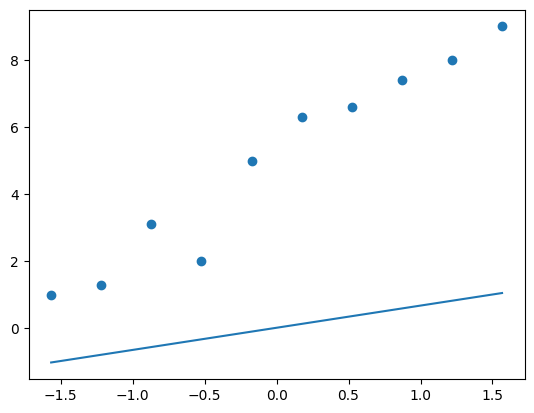

In [83]:
plt.scatter(xtrain_, ytrain_)
plt.plot(xtrain_, model(xtrain_).detach())

### Para o mtcars

In [129]:
import statsmodels
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [130]:
import statsmodels.api
data = statsmodels.api.datasets.get_rdataset('mtcars').data

In [131]:
data.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [132]:
data.nunique()

mpg     25
cyl      3
disp    27
hp      22
drat    22
wt      29
qsec    30
vs       2
am       2
gear     3
carb     6
dtype: int64

In [133]:
data = pd.get_dummies(data, columns=['cyl', 'vs', 'am', 'gear', 'carb'], dtype=int)

In [134]:
y = data['mpg'].values
X = data.drop(columns=['mpg']).values

In [135]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y.reshape(-1, 1), train_size=0.8, random_state=42)

In [136]:
xtrain.shape[1:]

(21,)

criando tensores

In [137]:
#treinamento
xtrain_ = torch.tensor( xtrain , dtype=torch.float32)
ytrain_ = torch.tensor( ytrain , dtype=torch.float32)

# teste
xtest_ = torch.tensor( xtest , dtype=torch.float32)
ytest_ = torch.tensor( ytest , dtype=torch.float32)

In [138]:
xtrain_[:, :5] = (xtrain_[:, :5]- xtrain_[:, :5].mean()) / xtrain_[:, :5].std()
xtest_[:, :5]  = (xtest_[:, :5]  - xtest_[:, :5].mean()) / xtest_[:, :5].std() 

In [140]:
xtrain_[0, :]

tensor([ 0.0045, -0.1151, -0.6844, -0.7042, -0.5482,  1.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000])

criando dataloader

In [141]:
xtrain_.shape[0] // 10

2

In [142]:
train = TensorDataset(xtrain_, ytrain_)
train = DataLoader(
    dataset = train, batch_size=10, shuffle=True, drop_last=True
)

criando o modelo

$\frac{\sum (y_i - \^y_i)^2 }{\sum (y_i - \bar y)^2}$

In [143]:
def RSE_loss(input_:torch.Tensor, output_:torch.Tensor):
    return    torch.sum( (input_ - output_).pow(2) ) \
            / torch.sum( (input_ - input_.mean()).pow(2) )  

criando o modelo de train

In [148]:
torch.manual_seed(seed=32)
weight = torch.randn(21, dtype=torch.float32)
weight.requires_grad_()
bias   = torch.zeros(1, requires_grad=True)
    
def modelo(x):
    p_ = weight.add(bias).reshape(-1, 1)
    return x @ p_

In [155]:
epoch= 100
lr_ = 0.001
melhor_, count_ = torch.inf, 0   
mean_r2, mean_loss = [], []

for epoch in range(epoch):
    loss_list, r2_list = [], []

    if paciencia == count_: break

    for enum_, (xbatch, ybatch) in enumerate(train, 1):
        pred = modelo(xbatch)
        loss = RSE_loss(ybatch, pred)
        loss.backward()

        printing_(enum_, len(train), loss.item(), 0.1)
        r2_list.append(r2_score(pred.detach(), ybatch))
        loss_list.append(loss.item())
        
        
    with torch.no_grad():
        weight -= weight.grad * lr_
        bias -= bias.grad * lr_
            
        weight.grad.zero_()
        bias.grad.zero_()
            
    print()
            
    mean_loss.append(np.mean(loss_list))
    mean_r2.append(np.mean(r2_list))

Batch 2/2 [====================>] 100.00% - Loss: 18.4744514
Batch 2/2 [====================>] 100.00% - Loss: 27.3446199
Batch 2/2 [====================>] 100.00% - Loss: 13.79219287
Batch 2/2 [====================>] 100.00% - Loss: 14.88026629
Batch 2/2 [====================>] 100.00% - Loss: 11.9165178
Batch 2/2 [====================>] 100.00% - Loss: 8.1331.1717
Batch 2/2 [====================>] 100.00% - Loss: 8.2743.9179
Batch 2/2 [====================>] 100.00% - Loss: 7.3799.9805
Batch 2/2 [====================>] 100.00% - Loss: 12.16377164
Batch 2/2 [====================>] 100.00% - Loss: 18.7580225
Batch 2/2 [====================>] 100.00% - Loss: 9.5937.5629
Batch 2/2 [====================>] 100.00% - Loss: 18.54686234
Batch 2/2 [====================>] 100.00% - Loss: 9.9649.3738
Batch 2/2 [====================>] 100.00% - Loss: 17.1239540
Batch 2/2 [====================>] 100.00% - Loss: 12.32224476
Batch 2/2 [====================>] 100.00% - Loss: 13.47570609
Batch 2/2 [==

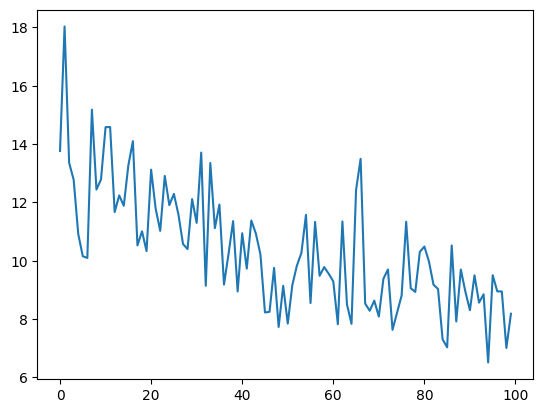

In [156]:
plt.plot(mean_loss)

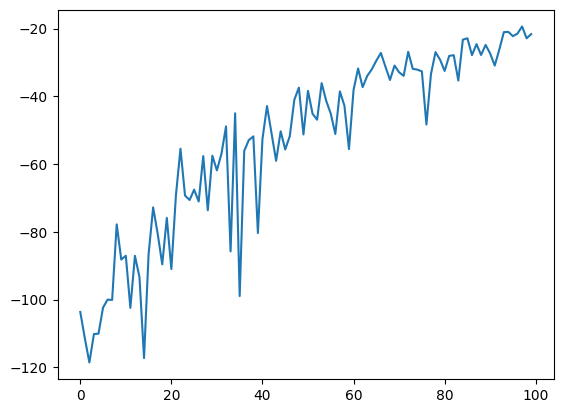

In [157]:
plt.plot(mean_r2)